In [32]:
from zzd.utils.assess import multi_scores
import numpy as np
import numpy as np
from sklearn import metrics
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

AraNetStruc2vec_c1  = []
AraNetStruc2vec_c2h = []
AraNetStruc2vec_c2p = []
AraNetStruc2vec_c3  = []

AraNetNode2vec_c1 = []
AraNetNode2vec_c2h = []
AraNetNode2vec_c2p = []
AraNetNode2vec_c3 = []


for i in range(10):
    AraNetStruc2vec_c1.append(  np.genfromtxt(f"./preds/10folds_C1223_Xgboost_AraNetStruc2vec/c1_test_pred_{i}.txt")[:,-2:])
    AraNetStruc2vec_c2h.append( np.genfromtxt(f"./preds/10folds_C1223_Xgboost_AraNetStruc2vec/c2h_pred_{i}.txt")[:,-2:])
    AraNetStruc2vec_c2p.append(  np.genfromtxt(f"./preds/10folds_C1223_Xgboost_AraNetStruc2vec/c2p_pred_{i}.txt")[:,-2:])  
    AraNetStruc2vec_c3.append(  np.genfromtxt(f"./preds/10folds_C1223_Xgboost_AraNetStruc2vec/c3_pred_{i}.txt")[:,-2:])    
       
    AraNetNode2vec_c1.append(   np.genfromtxt(f"./preds/10folds_C1223_Xgboost_AraNetNode2vec/c1_test_pred_{i}.txt")[:,-2:])
    AraNetNode2vec_c2h.append(  np.genfromtxt(f"./preds/10folds_C1223_Xgboost_AraNetNode2vec/c2h_pred_{i}.txt")[:,-2:])
    AraNetNode2vec_c2p.append(  np.genfromtxt(f"./preds/10folds_C1223_Xgboost_AraNetNode2vec/c2p_pred_{i}.txt")[:,-2:])
    AraNetNode2vec_c3.append(   np.genfromtxt(f"./preds/10folds_C1223_Xgboost_AraNetNode2vec/c3_pred_{i}.txt")[:,-2:])
    
    
data = [[
    AraNetStruc2vec_c1 ,
    AraNetStruc2vec_c2h ,
    AraNetStruc2vec_c2p ,
    AraNetStruc2vec_c3 ],

    [AraNetNode2vec_c1 ,
    AraNetNode2vec_c2h ,
    AraNetNode2vec_c2p ,
    AraNetNode2vec_c3] ,
]

#(2)统计AUPRC值
auprc_2_4_10_12 = np.zeros((2,4,10,12))  
auprc_2_4_10    = np.zeros((2,4,10))  
auprc_2_4_avg   = np.zeros((2,4,1))    

for i_m in range(2): #2 methods    
    for i_t in range(4):#4 test
        tmp = [multi_scores(data[i_m][i_t][_][:,0], data[i_m][i_t][_][:,1], show=False)
               for _ in range(10)]
        tmp = np.array(tmp) #(10,12)
        
        auprc_2_4_10_12[i_m,i_t] = tmp 

auprc_2_4_10 = auprc_2_4_10_12[:,:,:,-1]
auprc_2_4_avg = auprc_2_4_10.mean(2)

np.set_printoptions(suppress=True)

# "\t".join([str(f"{a:.1f}±{b:.1f}") for a,b in zip(single_sc_mean[:4],single_sc_std[:4])]) + "\t" +

keep_index = np.array([False,False,False,False,  True,True,True,  False,False,True,False,True])
print (np.array("TP	TN	FP	FN	PPV	TPR	TNR	Acc	mcc	f1	AUROC	AUPRC".split("\t"))[keep_index])
for t in range(4):
    for m in range(2):
        tmp = auprc_2_4_10_12[m,t]
        single_sc_mean = tmp.mean(0)
        single_sc_std = tmp.std(0)
        
        print(
              "\t".join([str(f"{a:.3f}±{b:.3f}") for a,b in zip(single_sc_mean[keep_index],single_sc_std[keep_index])]).replace("±0","±")
        )


['PPV' 'TPR' 'TNR' 'f1' 'AUPRC']
0.542±.096	0.354±.085	0.970±.004	0.427±.091	0.467±.102
0.536±.107	0.340±.088	0.971±.004	0.415±.098	0.471±.106
0.482±.201	0.064±.052	0.995±.003	0.110±.082	0.389±.043
0.000±.000	0.000±.000	1.000±.000	0.000±.000	0.313±.034
0.570±.046	0.374±.022	0.971±.005	0.451±.026	0.482±.042
0.569±.053	0.371±.026	0.972±.005	0.448±.029	0.475±.043
0.429±.217	0.055±.056	0.995±.003	0.092±.089	0.378±.050
0.000±.000	0.000±.000	1.000±.000	0.000±.000	0.306±.037


/tmp/ipykernel_177393/1378888037.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(('','regular test', '',


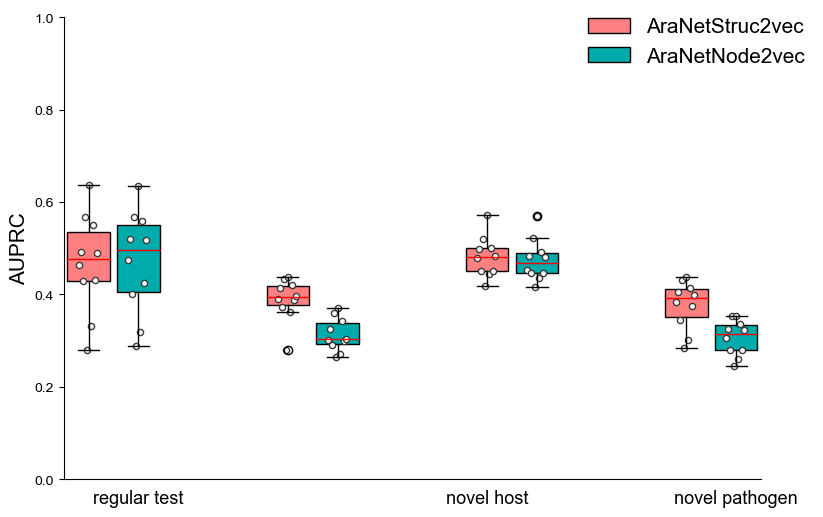

In [33]:
#(3)统计图
#数据
labels = ["AraNetStruc2vec","AraNetNode2vec"]
colors = ["#FF8080","#00ABAB","#DBDBDB"]

def middle_scatter(x):
    x = np.array(x)
    x.sort()
    return x[np.array([4,6,2,8,0,9,1,7,3,5])]

#格式
fig,ax = plt.subplots(1,1,figsize=(9,6))
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# ax.set_xticks()
ax.tick_params(bottom=False,top=False,left=True,right=False)
ax.set_xticklabels(('','regular test', '',
                    '','novel host','',
                    '','novel pathogen','',
                    '','novel host & pathogen',''),fontdict={"fontsize":13}, rotation=0)
ax.set_ylim(0,1)

ax.set_title("",fontdict={"fontsize":15},y=1.05)
ax.set_xlabel("",fontdict={"fontsize":15})
ax.set_ylabel("AUPRC",fontdict={"fontsize":15})

#绘图
bps=[]
for idx_t in range(4):#每个测试集
    for idx_m in range(2):#每种方法
        x = idx_t*4+idx_m
        y = auprc_2_4_10[idx_m][idx_t]
        # labels = [labels[idx_m],] if idx_m==0 else ['']
        #ax.scatter()
        
        bplot = ax.boxplot(y,positions=range(x,x+1),widths=0.85,patch_artist=True,labels=[labels[idx_m]], medianprops=dict(color='red'))
        bps.append(bplot)
        for patch in bplot['boxes']:
            patch.set_facecolor(colors[idx_m])     
            patch.set_zorder(1)
            
        ax.scatter(x+np.arange(10)*0.04-0.2, middle_scatter(y), s=20, color="#FBFBFB",edgecolors="#3B3B3B")
        #ax.scatter(x+np.arange(10)*0.03-0.15, middle_scatter(y), s=6, color="#000000",)


# plt.legend(fontsize=15,shadow=False,framealpha=0,bbox_to_anchor=(1.09, 1.04, ))
plt.legend([bps[0]["boxes"][0],bps[1]["boxes"][0],bps[2]["boxes"][0]],
            labels,
           shadow=False,
           framealpha=0,
           bbox_to_anchor=(1.09, 1.04, ),
           fontsize=15)
# plt.savefig('./pics/Figure_3种网络属性编码_论文章节2.svg', dpi=600,bbox_inches = 'tight',format="svg")